# Understanding the RIME formalism for visibility simulations

In this notebook, we discuss the radio interferometer measurement equation and explain how it can be used to simulate the visibilities for a radio interferometer observation. We follow explanations and conventions from O. Smirnov. For more background information we recommend to read his "Revisiting the radio interferometer measurement quation" paper series, which provides an excelent introduction and overview. ([Smirnov, A&A, Volume 527, March 2011](https://www.aanda.org/articles/aa/abs/2011/03/aa16082-10/aa16082-10.html))

Our software package $\texttt{pyvisgen}$ is a Python based implementation of the [VISGEN tool](https://github.com/piyanatk/MAPS/tree/master/visgen) developed at Haystack Observatory. We implemented the complete matrix calculation framework in PyTorch to enable GPU support. In the following, an introduction to the basic functionality is given.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Radio signals from brightnes distributions

TODO: explain brightness distributions, radio signals, stokes, brightness matrix B (just basic, no polarization yet)


defining FoV and pixel size

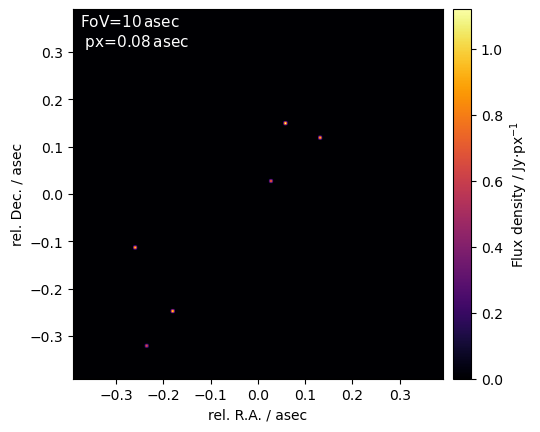

In [47]:
sky = torch.zeros((128, 128))
sky[68, 68] = 0.75
sky[45, 21] = 1.00
sky[88, 73] = 1.12
sky[11, 25] = 0.68
sky[23, 34] = 1.04
sky[83, 85] = 0.97

fov = 10
px_size = fov / sky.shape[0]

fig, ax = plt.subplots(1)
im1 = ax.imshow(
    sky,
    cmap="inferno",
    origin="lower",
    extent=[-5 * px_size, 5 * px_size, -5 * px_size, 5 * px_size],
)
ax.set_xlabel("rel. R.A. / asec")
ax.set_ylabel("rel. Dec. / asec")
cbar = fig.colorbar(im1, ax=ax, location="right", shrink=1, pad=0.02)
cbar.set_label("Flux density / Jy$\cdot$px$^{-1}$")
ax.text(
    -4.8 * px_size,
    4 * px_size,
    f"FoV={fov}$\,$asec\n px={round(px_size, 2)}$\,$asec",
    ha="left",
    size=11,
    color="white",
)
None

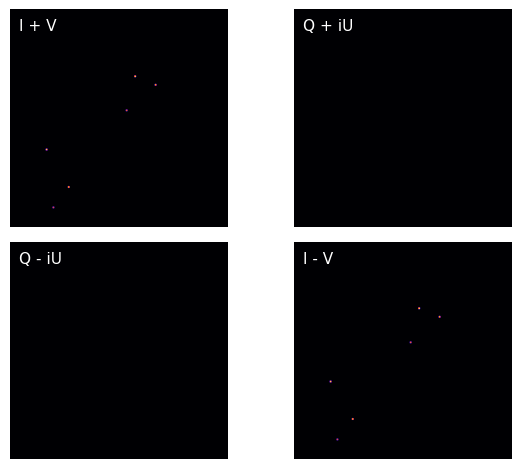

In [64]:
# Create Stokes vector for unpolarized emission
I = torch.zeros((sky.shape[0], sky.shape[1], 4), dtype=torch.cdouble)
I[..., 0] = sky  # Stokes I
# I[...,1] = 0   Stokes Q
# I[...,2] = 0   Stokes U
# I[...,3] = 0   Stokes V

# Create brightness matrix
B = torch.zeros((sky.shape[0], sky.shape[1], 2, 2), dtype=torch.cdouble)
B[:, :, 0, 0] = I[:, :, 0] + I[:, :, 1]
B[:, :, 0, 1] = I[:, :, 2] + 1j * I[:, :, 3]
B[:, :, 1, 0] = I[:, :, 2] - 1j * I[:, :, 3]
B[:, :, 1, 1] = I[:, :, 0] - I[:, :, 1]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
im1 = ax1.imshow(B[..., 0, 0].real, cmap="inferno", origin="lower")
im2 = ax2.imshow(B[..., 0, 1].real, cmap="inferno", origin="lower")
im3 = ax3.imshow(B[..., 1, 0].real, cmap="inferno", origin="lower")
im4 = ax4.imshow(B[..., 1, 1].real, cmap="inferno", origin="lower")

ax1.text(5, 115, "I + V", ha="left", size=11, color="white")
ax2.text(5, 115, "Q + iU", ha="left", size=11, color="white")
ax3.text(5, 115, "Q - iU", ha="left", size=11, color="white")
ax4.text(5, 115, "I - V", ha="left", size=11, color="white")

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
fig.tight_layout()

## Radio interferometer layout and coordinate systems

TODO: basics here, more insights in separate notebook?